In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

In [2]:
intersections = pd.read_csv('https://data-seattlecitygis.opendata.arcgis.com/datasets/0ea49a3a3ff54ae6af2aaae47dd680fe_5.csv')
intersections.head()

,X,Y,OBJECTID,INTR_ID,GIS_XCOORD,GIS_YCOORD,COMPKEY,COMPTYPE,UNITID,SUBAREA,UNITDESC,ARTERIALCLASSCD,SIGNAL_MAINT_DIST,SIGNAL_TYPE,SHAPE_LNG,SHAPE_LAT
0,-122.329732,47.523051,1,18213,1.270709e+06,194387.95532,340313,13,78852,GRDWM,4TH AVE S AND S HENDERSON N ST,0.0,,NONE,-122.329732,47.523051
1,-122.284745,47.633387,2,10302,1.282582e+06,234414.69508,157936,13,32854,E,WOODROW PL E AND E GARFIELD ST,0.0,,NONE,-122.284745,47.633387
2,-122.371401,47.692058,3,4716,1.261648e+06,256226.49721,37264,13,231740,BLRD,12TH AVE NW AND NW 87TH ST,0.0,,NONE,-122.371401,47.692058
3,-122.289176,47.617639,4,11483,1.281381e+06,228692.21187,30231,13,42513,CNTRL,34TH AVE AND E HOWELL ST,3.0,,NONE,-122.289176,47.617639
4,-122.320648,47.674000,5,6406,1.274017e+06,249395.18840,25752,13,14252,NE,NE 63RD ST AND NE RAVENNA EB BV,1.0,,NONE,-122.320648,47.674000


In [3]:
intersections = intersections[['COMPKEY', 'SUBAREA', 'ARTERIALCLASSCD', 'SIGNAL_TYPE', 'UNITDESC']]

In [4]:
intersections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15441 entries, 0 to 15440
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   COMPKEY          15441 non-null  int64  
 1   SUBAREA          15441 non-null  object 
 2   ARTERIALCLASSCD  15430 non-null  float64
 3   SIGNAL_TYPE      15441 non-null  object 
 4   UNITDESC         15441 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 603.3+ KB


In [5]:
df = pd.read_csv('../data/all_sdot_merged_with_wsdot_080820.csv', low_memory=False)

In [6]:
df.groupby(['LOCATION','YEAR']).count().shape

(119593, 179)

In this study, we're going to focus on intersections

In [7]:
df = df[df['ADDRTYPE'] == 'Intersection']

In [8]:
df.groupby(['INTKEY','LOCATION','YEAR']).count()['STATUS']

INTKEY    LOCATION                                                 YEAR
23807.0   GOLDEN GARDENS DR NW AND SEAVIEW PL NW                   2005    1
                                                                   2009    1
                                                                   2012    1
                                                                   2013    2
                                                                   2018    1
                                                                          ..
692345.0  23RD AVE NE AND NE 133RD ST                              2019    1
701817.0  5TH AVE AND TAYLOR AVE                                   2019    1
719862.0  SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLVD OFF RP  2019    1
725404.0  AURORA AVE N AND MERCER ST                               2019    1
757580.0  MAGNOLIA WAY W AND W HOWE ST                             2019    1
Name: STATUS, Length: 38144, dtype: int64

In [9]:
df = df.set_index(['INTKEY', 'LOCATION','YEAR'])

In [10]:
count_df = pd.DataFrame(df.groupby(level=[0,1,2]).count()['STATUS'])

In [11]:
count_df = count_df.rename(columns={'STATUS' : 'COUNT'})

In [12]:
count_df.head(25)

COUNT
INTKEY  LOCATION                               YEAR       
23807.0 GOLDEN GARDENS DR NW AND SEAVIEW PL NW 2005      1
                                               2009      1
                                               2012      1
                                               2013      2
                                               2018      1
23808.0 SEAVIEW AVE NW AND SEAVIEW PL NW       2012      1
                                               2015      1
23811.0 33RD AVE NW AND NW 80TH W ST           2011      1
23814.0 34TH AVE NW AND NW 77TH ST             2020      1
23815.0 33RD AVE NW AND NW 77TH ST             2005      1
                                               2011      1
23831.0 34TH AVE NW AND NW 71ST ST             2013      1
23833.0 33RD AVE NW AND NW 70TH ST             2013      1
23843.0 34TH AVE NW AND NW 68TH ST             2006      1
                                               2009      2
23855.0 34TH AVE NW AND NW 65TH ST             2006      3
                                               2007      1
                                               2010      1
                                               2016      1
                                               2020      1
23860.0 15TH AVE NW AND NW 83RD ST             2004      4
                                               2005      2
                                               2006      3
                                               2007      6
                                               2008      8

In [13]:
count_df['COUNT'].value_counts()

1     23197
2      7346
3      3331
4      1730
5      1003
6       598
7       332
8       228
9       145
10       87
11       53
12       33
13       24
14       10
16        7
15        6
17        3
18        3
24        2
20        2
19        1
21        1
22        1
27        1
Name: COUNT, dtype: int64

Adding Features of Crash Severity

In [14]:
df.groupby(level=[0,1,2])['TOTAL FATALITIES'].sum()

INTKEY    LOCATION                                                 YEAR
23807.0   GOLDEN GARDENS DR NW AND SEAVIEW PL NW                   2005    0.0
                                                                   2009    0.0
                                                                   2012    0.0
                                                                   2013    0.0
                                                                   2018    0.0
                                                                          ... 
692345.0  23RD AVE NE AND NE 133RD ST                              2019    0.0
701817.0  5TH AVE AND TAYLOR AVE                                   2019    0.0
719862.0  SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLVD OFF RP  2019    0.0
725404.0  AURORA AVE N AND MERCER ST                               2019    0.0
757580.0  MAGNOLIA WAY W AND W HOWE ST                             2019    0.0
Name: TOTAL FATALITIES, Length: 38144, dtype: float64

Let's add this as a column to the count_df

We noticed by limiting the scope to only consider intersections, fatalities are a lot less, with 2 or more deaths from collisions completely disappearing.

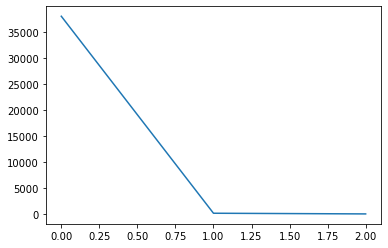

In [15]:
df.groupby(level=[0,1,2])['TOTAL FATALITIES'].sum().value_counts().plot()

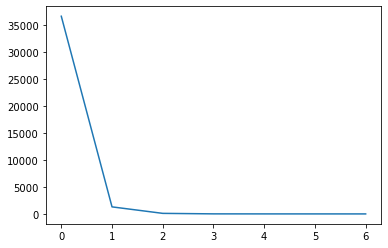

In [16]:
df.groupby(level=[0,1,2])['TOTAL SERIOUS INJURIES'].sum().value_counts().plot()

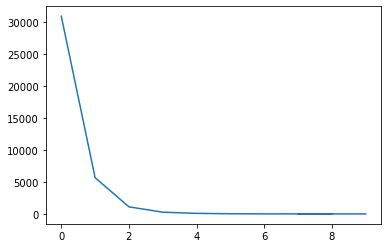

In [17]:
df.groupby(level=[0,1,2])['TOTAL EVIDENT INJURIES'].sum().value_counts().plot()

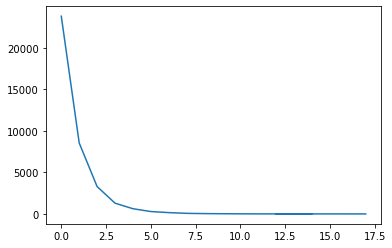

In [18]:
df.groupby(level=[0,1,2])['TOTAL POSSIBLE INJURIES'].sum().value_counts().plot()

In [19]:
count_df['TOTAL FATALITIES'] = df.groupby(level=[0,1,2])['TOTAL FATALITIES'].sum()
count_df['TOTAL SERIOUS INJURIES'] = df.groupby(level=[0,1,2])['TOTAL SERIOUS INJURIES'].sum()
count_df['TOTAL EVIDENT INJURIES'] = df.groupby(level=[0,1,2])['TOTAL EVIDENT INJURIES'].sum()
count_df['TOTAL POSSIBLE INJURIES'] = df.groupby(level=[0,1,2])['TOTAL POSSIBLE INJURIES'].sum()

In [20]:
count_df

COUNT  \
INTKEY   LOCATION                                           YEAR          
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005      1   
                                                            2009      1   
                                                            2012      1   
                                                            2013      2   
                                                            2018      1   
...                                                                 ...   
692345.0 23RD AVE NE AND NE 133RD ST                        2019      1   
701817.0 5TH AVE AND TAYLOR AVE                             2019      1   
719862.0 SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLV... 2019      1   
725404.0 AURORA AVE N AND MERCER ST                         2019      1   
757580.0 MAGNOLIA WAY W AND W HOWE ST                       2019      1   

                                                                  TOTAL FATALITIES  \
INTKEY   LOCATION                                           YEAR                     
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005               0.0   
                                                            2009               0.0   
                                                            2012               0.0   
                                                            2013               0.0   
                                                            2018               0.0   
...                                                                            ...   
692345.0 23RD AVE NE AND NE 133RD ST                        2019               0.0   
701817.0 5TH AVE AND TAYLOR AVE                             2019               0.0   
719862.0 SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLV... 2019               0.0   
725404.0 AURORA AVE N AND MERCER ST                         2019               0.0   
757580.0 MAGNOLIA WAY W AND W HOWE ST                       2019               0.0   

                                                                  TOTAL SERIOUS INJURIES  \
INTKEY   LOCATION                                           YEAR                           
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005                     0.0   
                                                            2009                     0.0   
                                                            2012                     0.0   
                                                            2013                     1.0   
                                                            2018                     0.0   
...                                                                                  ...   
692345.0 23RD AVE NE AND NE 133RD ST                        2019                     0.0   
701817.0 5TH AVE AND TAYLOR AVE                             2019                     0.0   
719862.0 SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLV... 2019                     0.0   
725404.0 AURORA AVE N AND MERCER ST                         2019                     0.0   
757580.0 MAGNOLIA WAY W AND W HOWE ST                       2019                     0.0   

                                                                  TOTAL EVIDENT INJURIES  \
INTKEY   LOCATION                                           YEAR                           
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005                     0.0   
                                                            2009                     0.0   
                                                            2012                     0.0   
                                                            2013                     0.0   
                                                            2018                     1.0   
...                                                                                  ...   
692345.0 23RD AVE NE AND NE 133RD ST  

In [21]:
intersections = intersections.rename(columns={'COMPKEY':'INTKEY'}).set_index(['INTKEY'])

In [22]:
count_df = count_df.join(intersections, on=['INTKEY'])
count_df

COUNT  \
INTKEY   LOCATION                                           YEAR          
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005      1   
                                                            2009      1   
                                                            2012      1   
                                                            2013      2   
                                                            2018      1   
...                                                                 ...   
692345.0 23RD AVE NE AND NE 133RD ST                        2019      1   
701817.0 5TH AVE AND TAYLOR AVE                             2019      1   
719862.0 SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLV... 2019      1   
725404.0 AURORA AVE N AND MERCER ST                         2019      1   
757580.0 MAGNOLIA WAY W AND W HOWE ST                       2019      1   

                                                                  TOTAL FATALITIES  \
INTKEY   LOCATION                                           YEAR                     
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005               0.0   
                                                            2009               0.0   
                                                            2012               0.0   
                                                            2013               0.0   
                                                            2018               0.0   
...                                                                            ...   
692345.0 23RD AVE NE AND NE 133RD ST                        2019               0.0   
701817.0 5TH AVE AND TAYLOR AVE                             2019               0.0   
719862.0 SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLV... 2019               0.0   
725404.0 AURORA AVE N AND MERCER ST                         2019               0.0   
757580.0 MAGNOLIA WAY W AND W HOWE ST                       2019               0.0   

                                                                  TOTAL SERIOUS INJURIES  \
INTKEY   LOCATION                                           YEAR                           
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005                     0.0   
                                                            2009                     0.0   
                                                            2012                     0.0   
                                                            2013                     1.0   
                                                            2018                     0.0   
...                                                                                  ...   
692345.0 23RD AVE NE AND NE 133RD ST                        2019                     0.0   
701817.0 5TH AVE AND TAYLOR AVE                             2019                     0.0   
719862.0 SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLV... 2019                     0.0   
725404.0 AURORA AVE N AND MERCER ST                         2019                     0.0   
757580.0 MAGNOLIA WAY W AND W HOWE ST                       2019                     0.0   

                                                                  TOTAL EVIDENT INJURIES  \
INTKEY   LOCATION                                           YEAR                           
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005                     0.0   
                                                            2009                     0.0   
                                                            2012                     0.0   
                                                            2013                     0.0   
                                                            2018                     1.0   
...                                                                                  ...   
692345.0 23RD AVE NE AND NE 133RD ST  

In [23]:
count_df.index

MultiIndex([( 23807.0, ...),
            ( 23807.0, ...),
            ( 23807.0, ...),
            ( 23807.0, ...),
            ( 23807.0, ...),
            ( 23808.0, ...),
            ( 23808.0, ...),
            ( 23811.0, ...),
            ( 23814.0, ...),
            ( 23815.0, ...),
            ...
            (662316.0, ...),
            (662316.0, ...),
            (673471.0, ...),
            (673474.0, ...),
            (673974.0, ...),
            (692345.0, ...),
            (701817.0, ...),
            (719862.0, ...),
            (725404.0, ...),
            (757580.0, ...)],
           names=['INTKEY', 'LOCATION', 'YEAR'], length=38144)

In [24]:
count_df.isna().values.sum()

537

So We want a 'severity metric' that takes into account the number of collisions an intersection has

In [25]:
count_df[['COUNT', 'TOTAL FATALITIES', 'TOTAL SERIOUS INJURIES', 'TOTAL EVIDENT INJURIES', 'TOTAL POSSIBLE INJURIES']].sum()

COUNT                      71643.0
TOTAL FATALITIES             139.0
TOTAL SERIOUS INJURIES      1570.0
TOTAL EVIDENT INJURIES      9278.0
TOTAL POSSIBLE INJURIES    25206.0
dtype: float64

We weight fatalities 5x a simple collision.

In [26]:
count_df['WEIGH_FATALITIES'] = count_df['TOTAL FATALITIES'] * 5

In [27]:
count_df['WEIGH_SERIOUS'] = count_df['TOTAL SERIOUS INJURIES'] * 4

In [28]:
count_df['WEIGH_EVIDENT'] = count_df['TOTAL EVIDENT INJURIES'] * 3

In [29]:
count_df['WEIGH_POSSIBLE'] = count_df['TOTAL POSSIBLE INJURIES'] * 2

In [30]:
weigh_columns = ['COUNT', 'WEIGH_FATALITIES', 'WEIGH_SERIOUS', 'WEIGH_EVIDENT', 'WEIGH_POSSIBLE']
weigh_total = count_df[weigh_columns].sum()

In [33]:
sev_score = count_df[weigh_columns].sum(axis=1) / weigh_total.sum()
sev_score

INTKEY    LOCATION                                                 YEAR
23807.0   GOLDEN GARDENS DR NW AND SEAVIEW PL NW                   2005    0.000006
                                                                   2009    0.000006
                                                                   2012    0.000006
                                                                   2013    0.000038
                                                                   2018    0.000025
                                                                             ...   
692345.0  23RD AVE NE AND NE 133RD ST                              2019    0.000019
701817.0  5TH AVE AND TAYLOR AVE                                   2019    0.000019
719862.0  SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLVD OFF RP  2019    0.000006
725404.0  AURORA AVE N AND MERCER ST                               2019    0.000006
757580.0  MAGNOLIA WAY W AND W HOWE ST                             2019    0.000006
Leng

In [34]:
(sev_score).sum()

1.0

In [35]:
count_df['sev_score'] = sev_score

In [36]:
count_df.iloc[18365]

COUNT                                        27
TOTAL FATALITIES                              0
TOTAL SERIOUS INJURIES                        1
TOTAL EVIDENT INJURIES                        5
TOTAL POSSIBLE INJURIES                      17
SUBAREA                                   DWNTN
ARTERIALCLASSCD                               1
SIGNAL_TYPE                               STATE
UNITDESC                   6TH AVE AND JAMES ST
WEIGH_FATALITIES                              0
WEIGH_SERIOUS                                 4
WEIGH_EVIDENT                                15
WEIGH_POSSIBLE                               34
sev_score                           0.000509996
Name: (29973.0, 6TH AVE AND JAMES ST, 2006), dtype: object

Group by year, find top ten, look at trends

In [42]:
count_df = count_df.drop(columns=['TOTAL FATALITIES', 'TOTAL SERIOUS INJURIES', 'TOTAL EVIDENT INJURIES','TOTAL POSSIBLE INJURIES'])

In [63]:
count_df

COUNT  \
INTKEY   LOCATION                                           YEAR          
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005      1   
                                                            2009      1   
                                                            2012      1   
                                                            2013      2   
                                                            2018      1   
...                                                                 ...   
692345.0 23RD AVE NE AND NE 133RD ST                        2019      1   
701817.0 5TH AVE AND TAYLOR AVE                             2019      1   
719862.0 SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLV... 2019      1   
725404.0 AURORA AVE N AND MERCER ST                         2019      1   
757580.0 MAGNOLIA WAY W AND W HOWE ST                       2019      1   

                                                                  SUBAREA  \
INTKEY   LOCATION                                           YEAR            
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005     BLRD   
                                                            2009     BLRD   
                                                            2012     BLRD   
                                                            2013     BLRD   
                                                            2018     BLRD   
...                                                                   ...   
692345.0 23RD AVE NE AND NE 133RD ST                        2019        N   
701817.0 5TH AVE AND TAYLOR AVE                             2019    DWNTN   
719862.0 SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLV... 2019       NE   
725404.0 AURORA AVE N AND MERCER ST                         2019  MGNL-QA   
757580.0 MAGNOLIA WAY W AND W HOWE ST                       2019  MGNL-QA   

                                                                  ARTERIALCLASSCD  \
INTKEY   LOCATION                                           YEAR                    
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005              2.0   
                                                            2009              2.0   
                                                            2012              2.0   
                                                            2013              2.0   
                                                            2018              2.0   
...                                                                           ...   
692345.0 23RD AVE NE AND NE 133RD ST                        2019              0.0   
701817.0 5TH AVE AND TAYLOR AVE                             2019              2.0   
719862.0 SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLV... 2019              4.0   
725404.0 AURORA AVE N AND MERCER ST                         2019              1.0   
757580.0 MAGNOLIA WAY W AND W HOWE ST                       2019              0.0   

                                                                 SIGNAL_TYPE  \
INTKEY   LOCATION                                           YEAR               
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005        NONE   
                                                            2009        NONE   
                                                            2012        NONE   
                                                            2013        NONE   
                                                            2018        NONE   
...                                                                      ...   
692345.0 23RD AVE NE AND NE 133RD ST                        2019               
701817.0 5TH AVE AND TAYLOR AVE                             2019               
719862.0 SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLV... 2019               
725404.0 AURORA AVE N AND MERCER ST                         2019               
757580.0 MAGNOLIA WAY 

In [96]:
df = df[~df.index.duplicated()]

In [97]:
#count_df_full = count_df.join(df, on=['INTKEY','LOCATION','YEAR'], how='left', lsuffix=' ALL')
count_df_full = count_df.merge(df, on=['INTKEY','LOCATION','YEAR'], how='left')

In [98]:
count_df_full

COUNT  \
INTKEY   LOCATION                                           YEAR          
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005      1   
                                                            2009      1   
                                                            2012      1   
                                                            2013      2   
                                                            2018      1   
...                                                                 ...   
692345.0 23RD AVE NE AND NE 133RD ST                        2019      1   
701817.0 5TH AVE AND TAYLOR AVE                             2019      1   
719862.0 SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLV... 2019      1   
725404.0 AURORA AVE N AND MERCER ST                         2019      1   
757580.0 MAGNOLIA WAY W AND W HOWE ST                       2019      1   

                                                                  SUBAREA  \
INTKEY   LOCATION                                           YEAR            
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005     BLRD   
                                                            2009     BLRD   
                                                            2012     BLRD   
                                                            2013     BLRD   
                                                            2018     BLRD   
...                                                                   ...   
692345.0 23RD AVE NE AND NE 133RD ST                        2019        N   
701817.0 5TH AVE AND TAYLOR AVE                             2019    DWNTN   
719862.0 SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLV... 2019       NE   
725404.0 AURORA AVE N AND MERCER ST                         2019  MGNL-QA   
757580.0 MAGNOLIA WAY W AND W HOWE ST                       2019  MGNL-QA   

                                                                  ARTERIALCLASSCD  \
INTKEY   LOCATION                                           YEAR                    
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005              2.0   
                                                            2009              2.0   
                                                            2012              2.0   
                                                            2013              2.0   
                                                            2018              2.0   
...                                                                           ...   
692345.0 23RD AVE NE AND NE 133RD ST                        2019              0.0   
701817.0 5TH AVE AND TAYLOR AVE                             2019              2.0   
719862.0 SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLV... 2019              4.0   
725404.0 AURORA AVE N AND MERCER ST                         2019              1.0   
757580.0 MAGNOLIA WAY W AND W HOWE ST                       2019              0.0   

                                                                 SIGNAL_TYPE  \
INTKEY   LOCATION                                           YEAR               
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005        NONE   
                                                            2009        NONE   
                                                            2012        NONE   
                                                            2013        NONE   
                                                            2018        NONE   
...                                                                      ...   
692345.0 23RD AVE NE AND NE 133RD ST                        2019               
701817.0 5TH AVE AND TAYLOR AVE                             2019               
719862.0 SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLV... 2019               
725404.0 AURORA AVE N AND MERCER ST                         2019               
757580.0 MAGNOLIA WAY 

In [99]:
pd.DataFrame(count_df_full['sev_score'].sort_values(ascending=False))

sev_score
INTKEY  LOCATION                               YEAR           
29973.0 6TH AVE AND JAMES ST                   2006   0.000510
                                               2017   0.000453
29914.0 6TH AVE AND UNIVERSITY ST              2014   0.000351
29933.0 5TH AVE AND SPRING ST                  2009   0.000351
35965.0 MERIDIAN AVE N AND N 130TH ST          2006   0.000338
...                                                        ...
30754.0 20TH AVE S AND S JACKSON ST            2011   0.000006
30756.0 22ND AVE S AND S JACKSON ST            2006   0.000006
                                               2008   0.000006
                                               2011   0.000006
23807.0 GOLDEN GARDENS DR NW AND SEAVIEW PL NW 2005   0.000006

[38144 rows x 1 columns]

In [100]:
count_df_full['sev_score'].sum()

1.0

In [45]:
[print(col) for col in count_df_full.columns];

COUNT
SUBAREA
ARTERIALCLASSCD
SIGNAL_TYPE
UNITDESC
WEIGH_FATALITIES
WEIGH_SERIOUS
WEIGH_EVIDENT
WEIGH_POSSIBLE
sev_score
longitude
latitude
OBJECTID
INCKEY
COLDETKEY
REPORTNO
STATUS
ADDRTYPE
EXCEPTRSNCODE
EXCEPTRSNDESC
SEVERITYCODE
SEVERITYDESC
COLLISIONTYPE
PERSONCOUNT
PEDCOUNT
PEDCYLCOUNT
VEHCOUNT
INJURIES
SERIOUSINJURIES
FATALITIES
INCDATE
INCDTTM
JUNCTIONTYPE
SDOT_COLCODE
SDOT_COLDESC
INATTENTIONIND
UNDERINFL
WEATHER_x
ROADCOND
LIGHTCOND
SDOTCOLNUM
ST_COLCODE
ST_COLDESC
SEGLANEKEY
CROSSWALKKEY
HITPARKEDCAR
JURISDICTION
COUNTY
CITY
INDEXED PRIMARY TRAFFICWAY
PRIMARY TRAFFICWAY
BLOCK NUMBER
MILEPOST
INTERSECTING TRAFFICWAY
DIST FROM REF POINT
MI or FT
COMP DIR FROM REF POINT
REFERENCE POINT NAME
DATE
QTR #
MONTH
FULL TIME
MOST SEVERE SOBRIETY TYPE
MOST SEVERE INJURY TYPE
TOTAL CRASHES
FATAL CRASHES
SERIOUS INJURY CRASHES
EVIDENT INJURY CRASHES
POSSIBLE INJURY CRASHES
PDO - NO INJURY CRASHES
TOTAL FATALITIES
TOTAL SERIOUS INJURIES
TOTAL EVIDENT INJURIES
TOTAL POSSIBLE INJURIES
TOTAL V

In [101]:
import pickle

pickle.dump(count_df_full, open('../data/processed/intersections_sev_full', 'wb'))